In [3]:
pip install "numpy<2.0" 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mtcnn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.1 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%%bash
nvidia-smi

Fri Mar 28 13:04:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.07             Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   51C    P8             12W /  140W |      85MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:

import shutil
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from multiprocessing import Pool, cpu_count
from mtcnn import MTCNN

2025-03-28 13:17:15.996993: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 13:17:16.014289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743167836.033564    8222 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743167836.039262    8222 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743167836.054952    8222 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7700)])  

In [3]:
path = 'Real_Data/Extracted/'

In [4]:
dir_ = os.listdir('./Real_Data/Extracted/')

In [5]:
dir_

['fadg0',
 'faks0',
 'fcft0',
 'fcmh0',
 'fdac1',
 'fdrd1',
 'fedw0',
 'felc0',
 'fjas0',
 'fjem0',
 'fjre0',
 'fjwb0',
 'fkms0',
 'fram1',
 'mccs0',
 'mcem0',
 'mdab0',
 'mdbb0',
 'mdld0',
 'mgwt0',
 'mjar0',
 'mjsw0',
 'mmdb1',
 'mmdm2',
 'mpdf0',
 'mpgl0',
 'mrcz0',
 'mrgg0',
 'mrjo0',
 'msjs1',
 'mstk0',
 'mwbt0']

In [6]:
os.listdir(path + "fadg0")

['audio', 'video']

In [7]:
for i in dir_:
    a = i + "/video"
    print(os.listdir(path + i +'/video')[3:])

['sa1', 'sa2', 'si1279', 'si1909', 'si649', 'sx109', 'sx19', 'sx199', 'sx289', 'sx379']
['sa1', 'sa2', 'si1573', 'si2203', 'si943', 'sx133', 'sx223', 'sx313', 'sx403', 'sx43']
['sa1', 'sa2', 'si1178', 'si1808', 'si548', 'sx188', 'sx278', 'sx368', 'sx8', 'sx98']
['sa1', 'sa2', 'si1454', 'si2084', 'si824', 'sx104', 'sx14', 'sx194', 'sx284', 'sx374']
['sa1', 'sa2', 'si1474', 'si2104', 'si844', 'sx124', 'sx214', 'sx304', 'sx34', 'sx394']
['sa1', 'sa2', 'si1544', 'si1566', 'si2149', 'sx104', 'sx14', 'sx194', 'sx284', 'sx374']
['sa1', 'sa2', 'si1084', 'si1653', 'si1714', 'sx184', 'sx274', 'sx364', 'sx4', 'sx94']
['sa1', 'sa2', 'si1386', 'si2016', 'si756', 'sx126', 'sx216', 'sx306', 'sx36', 'sx396']
['sa1', 'sa2', 'si1400', 'si2030', 'si770', 'sx140', 'sx230', 'sx320', 'sx410', 'sx50']
['sa1', 'sa2', 'si1264', 'si1894', 'si634', 'sx184', 'sx274', 'sx364', 'sx4', 'sx94']
['sa1', 'sa2', 'si1116', 'si1587', 'si1746', 'sx126', 'sx216', 'sx306', 'sx36', 'sx396']
['sa1', 'sa2', 'si1265', 'si635', '

In [8]:
for i in os.listdir('Real_Data/Extracted/fadg0/video/sa1'):
    name = i + '.jpg'
    os.rename(path + i, name)

FileNotFoundError: [Errno 2] No such file or directory: 'Real_Data/Extracted/001.jpg.jpg.jpg' -> '001.jpg.jpg.jpg.jpg'

In [9]:
subject_ids = os.listdir(path)

In [10]:
subject_ids

['fadg0',
 'faks0',
 'fcft0',
 'fcmh0',
 'fdac1',
 'fdrd1',
 'fedw0',
 'felc0',
 'fjas0',
 'fjem0',
 'fjre0',
 'fjwb0',
 'fkms0',
 'fram1',
 'mccs0',
 'mcem0',
 'mdab0',
 'mdbb0',
 'mdld0',
 'mgwt0',
 'mjar0',
 'mjsw0',
 'mmdb1',
 'mmdm2',
 'mpdf0',
 'mpgl0',
 'mrcz0',
 'mrgg0',
 'mrjo0',
 'msjs1',
 'mstk0',
 'mwbt0']

In [11]:
os.listdir('Real_Data/Extracted/fadg0/video/sa1')

['001.jpg.jpg.jpg',
 '002.jpg.jpg.jpg',
 '003.jpg.jpg.jpg',
 '004.jpg.jpg.jpg',
 '005.jpg.jpg.jpg',
 '006.jpg.jpg.jpg',
 '007.jpg.jpg.jpg',
 '008.jpg.jpg.jpg',
 '009.jpg.jpg.jpg',
 '010.jpg.jpg.jpg',
 '011.jpg.jpg.jpg',
 '012.jpg.jpg.jpg',
 '013.jpg.jpg.jpg',
 '014.jpg.jpg.jpg',
 '015.jpg.jpg.jpg',
 '016.jpg.jpg.jpg',
 '017.jpg.jpg.jpg',
 '018.jpg.jpg.jpg',
 '019.jpg.jpg.jpg',
 '020.jpg.jpg.jpg',
 '021.jpg.jpg.jpg',
 '022.jpg.jpg.jpg',
 '023.jpg.jpg.jpg',
 '024.jpg.jpg.jpg',
 '025.jpg.jpg.jpg',
 '026.jpg.jpg.jpg',
 '027.jpg.jpg.jpg',
 '028.jpg.jpg.jpg',
 '029.jpg.jpg.jpg',
 '030.jpg.jpg.jpg',
 '031.jpg.jpg.jpg',
 '032.jpg.jpg.jpg',
 '033.jpg.jpg.jpg',
 '034.jpg.jpg.jpg',
 '035.jpg.jpg.jpg',
 '036.jpg.jpg.jpg',
 '037.jpg.jpg.jpg',
 '038.jpg.jpg.jpg',
 '039.jpg.jpg.jpg',
 '040.jpg.jpg.jpg',
 '041.jpg.jpg.jpg',
 '042.jpg.jpg.jpg',
 '043.jpg.jpg.jpg',
 '044.jpg.jpg.jpg',
 '045.jpg.jpg.jpg',
 '046.jpg.jpg.jpg',
 '047.jpg.jpg.jpg',
 '048.jpg.jpg.jpg',
 '049.jpg.jpg.jpg',
 '050.jpg.jpg.jpg',


In [26]:
for subject in subject_ids:
    new_path = path + subject + '/video/'
    categories = os.listdir(new_path)[3:]
    for cat in categories:
        frames = os.listdir(new_path + cat)
        for frame in frames:
            frame_path = new_path + cat + '/'
            os.rename(frame_path + frame, frame_path+frame + '.jpg')


## ***Detecting Cordinates Of Face In Each Frame By MTCNN and Converting Videos Of Fake Dataset Into Compressed .npz***

In [8]:
fake_data_dir = os.listdir('Fake_Data/higher_quality')

In [38]:
path = 'Fake_Data/higher_quality/'

In [21]:
# Reading a video frame by frame and detecting cordinates of the face. Returning a numpy array of size (Total number of frames,244,244,3)

def video_to_numpy(path):
    detector = MTCNN(device = "GPU:0")
    array_list = []
    cap = cv2.VideoCapture(path)
    if cap.isOpened() == False:
        raise RuntimeError

    while cap.isOpened():
        ret, frame = cap.read()
    
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            face = detector.detect_faces(frame)
            if not face :
                continue
            col_1, row_1, col_2, row_2 = face[0]['box']
            col_1_, row_1_, col_2_, row_2_ = col_1, row_1, col_2 + col_1, row_2 + row_1
            frame = frame[row_1_ : row_2_, col_1_ : col_2_]
            
            if frame is None or frame.size == 0:
                continue
                
            frame = cv2.resize(frame, dsize = (224,224))
            array_list.append(frame)
    
        else: 
            break

    cap.release()
            
    return np.array(array_list)

In [6]:
real_data_dir = os.listdir('Real_Data_Video')

In [10]:
path = 'Real_Data_Video/'

In [14]:
for subject in real_data_dir:
    
    os.makedirs('./Real_Data_Video_Numpy/'+ subject, exist_ok=True)
    sub_path = path + subject

    for video in os.listdir(sub_path):
        array = video_to_numpy(sub_path + '/' + video)
        video_path = "./Real_Data_Video_Numpy/"+ subject + '/' + video
        np.savez_compressed(video_path, array)
        print(video_path)


./Real_Data_Video_Numpy/fadg0/sa1.mp4
./Real_Data_Video_Numpy/fadg0/sa2.mp4
./Real_Data_Video_Numpy/fadg0/si1279.mp4
./Real_Data_Video_Numpy/fadg0/si1909.mp4
./Real_Data_Video_Numpy/fadg0/si649.mp4
./Real_Data_Video_Numpy/fadg0/sx109.mp4
./Real_Data_Video_Numpy/fadg0/sx19.mp4
./Real_Data_Video_Numpy/fadg0/sx199.mp4
./Real_Data_Video_Numpy/fadg0/sx289.mp4
./Real_Data_Video_Numpy/fadg0/sx379.mp4
./Real_Data_Video_Numpy/faks0/sa1.mp4
./Real_Data_Video_Numpy/faks0/sa2.mp4
./Real_Data_Video_Numpy/faks0/si1573.mp4
./Real_Data_Video_Numpy/faks0/si2203.mp4
./Real_Data_Video_Numpy/faks0/si943.mp4
./Real_Data_Video_Numpy/faks0/sx133.mp4
./Real_Data_Video_Numpy/faks0/sx223.mp4
./Real_Data_Video_Numpy/faks0/sx313.mp4
./Real_Data_Video_Numpy/faks0/sx403.mp4
./Real_Data_Video_Numpy/faks0/sx43.mp4
./Real_Data_Video_Numpy/fcft0/sa1.mp4
./Real_Data_Video_Numpy/fcft0/sa2.mp4
./Real_Data_Video_Numpy/fcft0/si1178.mp4
./Real_Data_Video_Numpy/fcft0/si1808.mp4
./Real_Data_Video_Numpy/fcft0/si548.mp4
./Real_D

In [30]:
for subject in fake_data_dir[9:]:
    
    os.makedirs('./Fake_Data_Numpy/'+ subject, exist_ok=True)
    sub_path = path + subject

    for video in os.listdir(sub_path):
        if video.endswith('.avi'):
            array = video_to_numpy(sub_path + '/' + video)
            video_path = './Fake_Data_Numpy/'+ subject + '/' + video.split(sep = '-')[0]
            np.savez_compressed(video_path, array)
            print(video_path)


I0000 00:00:1743062077.669225    2543 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1743062079.519780    2543 cuda_dnn.cc:529] Loaded cuDNN version 90300


./Fake_Data_Numpy/fjem0/sa1
./Fake_Data_Numpy/fjem0/sa2
./Fake_Data_Numpy/fjem0/si1264
./Fake_Data_Numpy/fjem0/si1894
./Fake_Data_Numpy/fjem0/si634
./Fake_Data_Numpy/fjem0/sx184
./Fake_Data_Numpy/fjem0/sx274
./Fake_Data_Numpy/fjem0/sx364
./Fake_Data_Numpy/fjem0/sx4
./Fake_Data_Numpy/fjem0/sx94
./Fake_Data_Numpy/fjre0/sa1
./Fake_Data_Numpy/fjre0/sa2
./Fake_Data_Numpy/fjre0/si1116
./Fake_Data_Numpy/fjre0/si1587
./Fake_Data_Numpy/fjre0/si1746
./Fake_Data_Numpy/fjre0/sx126
./Fake_Data_Numpy/fjre0/sx216
./Fake_Data_Numpy/fjre0/sx306
./Fake_Data_Numpy/fjre0/sx36
./Fake_Data_Numpy/fjre0/sx396
./Fake_Data_Numpy/fjwb0/sa1
./Fake_Data_Numpy/fjwb0/sa2
./Fake_Data_Numpy/fjwb0/si1265
./Fake_Data_Numpy/fjwb0/si635
./Fake_Data_Numpy/fjwb0/si992
./Fake_Data_Numpy/fjwb0/sx185
./Fake_Data_Numpy/fjwb0/sx275
./Fake_Data_Numpy/fjwb0/sx365
./Fake_Data_Numpy/fjwb0/sx5
./Fake_Data_Numpy/fjwb0/sx95
./Fake_Data_Numpy/fkms0/sa1
./Fake_Data_Numpy/fkms0/sa2
./Fake_Data_Numpy/fkms0/si1490
./Fake_Data_Numpy/fkms0/si

## ***Following same steps for the real dataset but in this case we have frames instead of the video***

In [3]:
path = 'Real_Data/Extracted/'

In [4]:
real_dir = os.listdir('Real_Data/Extracted/') 

In [5]:
def image_to_numpy(path):
    array_list = []
    images = os.listdir(path)
    detector = MTCNN(device = "GPU:0")
    for image in images:
        img_path = path + '/' + image
        frame = cv2.imread(img_path)
        if frame is None or frame.size == 0:
            continue
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        face = detector.detect_faces(frame)
        if not face :
            continue
        col_1, row_1, col_2, row_2 = face[0]['box']
        col_1_, row_1_, col_2_, row_2_ = col_1, row_1, col_2 + col_1, row_2 + row_1 
        frame = frame[row_1_ : row_2_, col_1_ : col_2_]
        
        frame = cv2.resize(frame, dsize = (224,224))
        
        array_list.append(frame)

    return np.array(array_list)

In [6]:
for subject in real_dir:
    os.makedirs('./Real_Data_Numpy/' + subject, exist_ok=True)
    sub_path = path + subject + '/video/'
    for category in os.listdir(sub_path)[3:]:
        category_path = 'Real_Data_Numpy/' + subject + '/' + category
        array = image_to_numpy(sub_path + category)
        np.savez_compressed(category_path,array)
        print(category_path)
    

I0000 00:00:1743072481.234513    9508 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1743072482.905381    9508 cuda_dnn.cc:529] Loaded cuDNN version 90300


Real_Data_Numpy/fadg0/sa1
Real_Data_Numpy/fadg0/sa2
Real_Data_Numpy/fadg0/si1279
Real_Data_Numpy/fadg0/si1909
Real_Data_Numpy/fadg0/si649
Real_Data_Numpy/fadg0/sx109
Real_Data_Numpy/fadg0/sx19
Real_Data_Numpy/fadg0/sx199
Real_Data_Numpy/fadg0/sx289
Real_Data_Numpy/fadg0/sx379
Real_Data_Numpy/faks0/sa1
Real_Data_Numpy/faks0/sa2
Real_Data_Numpy/faks0/si1573
Real_Data_Numpy/faks0/si2203
Real_Data_Numpy/faks0/si943
Real_Data_Numpy/faks0/sx133
Real_Data_Numpy/faks0/sx223
Real_Data_Numpy/faks0/sx313
Real_Data_Numpy/faks0/sx403
Real_Data_Numpy/faks0/sx43
Real_Data_Numpy/fcft0/sa1
Real_Data_Numpy/fcft0/sa2
Real_Data_Numpy/fcft0/si1178
Real_Data_Numpy/fcft0/si1808
Real_Data_Numpy/fcft0/si548
Real_Data_Numpy/fcft0/sx188
Real_Data_Numpy/fcft0/sx278
Real_Data_Numpy/fcft0/sx368
Real_Data_Numpy/fcft0/sx8
Real_Data_Numpy/fcft0/sx98
Real_Data_Numpy/fcmh0/sa1
Real_Data_Numpy/fcmh0/sa2
Real_Data_Numpy/fcmh0/si1454
Real_Data_Numpy/fcmh0/si2084
Real_Data_Numpy/fcmh0/si824
Real_Data_Numpy/fcmh0/sx104
Real_

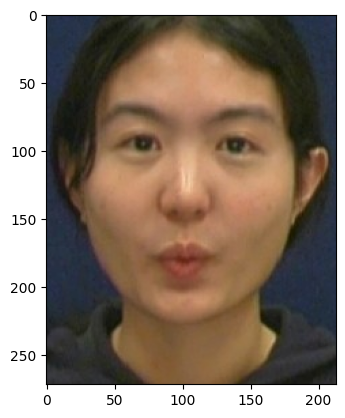

In [158]:
plt.imshow(a)



In [72]:
for i in os.listdir("./Real_Data/Extracted/fcft0/video/si1808/"):
    print(i)

001.jpg.jpg
002.jpg.jpg
003.jpg.jpg
004.jpg.jpg
005.jpg.jpg
006.jpg.jpg
007.jpg.jpg
008.jpg.jpg
009.jpg.jpg
010.jpg.jpg
011.jpg.jpg
012.jpg.jpg
013.jpg.jpg
014.jpg.jpg
015.jpg.jpg
016.jpg.jpg
017.jpg.jpg
018.jpg.jpg
019.jpg.jpg
020.jpg.jpg
021.jpg.jpg
022.jpg.jpg
023.jpg.jpg
024.jpg.jpg
025.jpg.jpg
026.jpg.jpg
027.jpg.jpg
028.jpg.jpg
029.jpg.jpg
030.jpg.jpg
031.jpg.jpg
032.jpg.jpg
033.jpg.jpg
034.jpg.jpg
035.jpg.jpg
036.jpg.jpg
037.jpg.jpg
038.jpg.jpg
039.jpg.jpg
040.jpg.jpg
041.jpg.jpg
042.jpg.jpg
043.jpg.jpg
044.jpg.jpg
045.jpg.jpg
046.jpg.jpg
047.jpg.jpg
048.jpg.jpg
049.jpg.jpg
050.jpg.jpg
051.jpg.jpg
052.jpg.jpg
053.jpg.jpg
054.jpg.jpg
055.jpg.jpg
056.jpg.jpg
057.jpg.jpg
058.jpg.jpg
059.jpg.jpg
060.jpg.jpg
061.jpg.jpg
062.jpg.jpg
063.jpg.jpg
064.jpg.jpg
065.jpg.jpg
066.jpg.jpg
067.jpg.jpg
068.jpg.jpg
069.jpg.jpg
070.jpg.jpg
071.jpg.jpg
072.jpg.jpg
073.jpg.jpg
074.jpg.jpg
075.jpg.jpg
076.jpg.jpg
077.jpg.jpg
078.jpg.jpg
079.jpg.jpg
080.jpg.jpg
081.jpg.jpg
082.jpg.jpg
083.jpg.jpg
084.

In [3]:
fake_dir = os.listdir("Fake_Data_Numpy/")

In [78]:
shape_array = np.inf
for i in fake_dir:
    video_array = os.listdir("Fake_Data_Numpy/" + i)
    for j in video_array:

        path = "Fake_Data_Numpy/" + i +'/' + j
        array = np.load(path)['arr_0']
        if array.shape[0]<shape_array:
            shape_array = array.shape[0]
            del(array)
            print(i, shape_array)
        

fadg0 119
fadg0 103
fadg0 72
fcft0 62
fdrd1 61
fedw0 57
mdab0 56
mgwt0 19
mjar0 11


## ***Model building and training***

In [1]:
import gc
def data_gen(fake_list, real_list, batch_size, frame_threshold,type_, shuffle = True):

    '''fake_list : list of paths of the videos in the fake data directory
        real_list : list of paths of the videos in the real data directory
        batch_size : integer, number of videos to be fetch. When using it for validation gen, then choose the size such that it compleatly divides the total number of videos in one validation set
        frame_threshold : integer, number of frames to keep in all videos. Padding will be done automatically
        shuffle : Default (Shuffle = True), Used to shuffle the dataset in each epoch. For the validation generator, shuffle == False, provides better generalization results.
        
        Return: return a tuple (data, labels)'''
    
    mix_data = np.concatenate((fake_list, real_list))
    labels = np.concatenate((np.zeros(shape=(fake_list.shape[0])), np.ones(shape = (real_list.shape[0])))).astype(np.float32)
    num_videos = len(fake_list) * 2
    mix_data_index = np.random.permutation(np.arange(0,num_videos))
    count = 0
    
    rnet = keras.applications.ResNet50(include_top = False, weights = 'imagenet')
    preprocess = keras.applications.resnet.preprocess_input
        
    while True:
        mix_data_array = tf.Variable(tf.zeros(shape = (batch_size,frame_threshold,7,7,2048)))
        mix_labels =  tf.Variable(tf.zeros(shape = (batch_size,)))

        for i in range(batch_size):

            mix_array = np.load(mix_data[mix_data_index[count]])['arr_0']



            if mix_array.shape[0] < frame_threshold: # Adding reaming frames to video
                remaining_frames = frame_threshold - mix_array.shape[0]             
                mix_array = np.concatenate([mix_array,np.zeros(shape = (remaining_frames,224,224,3))], axis = 0)

            if mix_array.shape[0] > frame_threshold: # Slicing the extra frames from the video
                mix_array = mix_array[:frame_threshold]


            mix_data_array[i].assign(tf.constant(rnet.predict(preprocess(mix_array), verbose = False)))
            mix_labels[i].assign(tf.constant(labels[mix_data_index[count]]))
                

            count = count + 1
        
        if (abs(count - mix_data_index.shape[0]) < batch_size) & (shuffle == False):
            
            count = 0
            gc.collect()

        elif (abs(count - mix_data_index.shape[0]) < batch_size) & (shuffle == True):
            
            mix_data_index = np.random.permutation(np.arange(0,num_videos))
            count = 0
            gc.collect()

                

        yield (mix_data_array, mix_labels)


In [2]:
fake_data_array = np.array([], dtype = 'object')
for i,j,k in os.walk('Fake_Data_Numpy'):
    temp = i + '/' + np.array(k, dtype = 'object')
    fake_data_array = np.append(fake_data_array,temp)

NameError: name 'np' is not defined

In [6]:
# real_data_array = np.array([], dtype = 'object')
# for i,j,k in os.walk('Real_Data_Numpy/'):
#     temp = i + '/' + np.array(k, dtype = 'object')
#     real_data_array = np.append(real_data_array,temp)


real_data_video_array = np.array([], dtype = 'object')
for i,j,k in os.walk('Real_Data_Video_Numpy/'):
    temp = i + '/' + np.array(k, dtype = 'object')
    real_data_video_array = np.append(real_data_video_array,temp)

In [7]:
batch_size = 4
n_frame = 60

In [8]:
l2 = keras.regularizers.l2

In [9]:
training_size = int(fake_data_array.shape[0]  * 0.8)
validation_size = int(fake_data_array.shape[0] * 0.2)

In [10]:
training_gen = data_gen(fake_data_array[:training_size], real_data_video_array[:training_size],batch_size,n_frame,type_='training')
validation_gen = data_gen(fake_data_array[training_size : training_size + validation_size], real_data_video_array[training_size : training_size + validation_size], batch_size, n_frame, type_ = 'val',shuffle =False )

In [11]:
def network():
    input_ = keras.layers.Input(shape = (n_frame, 7,7,2048))
    
    x = keras.layers.TimeDistributed(keras.layers.BatchNormalization())(input_)
    x = keras.layers.TimeDistributed(keras.layers.Flatten())(x)
    
    x = keras.layers.LSTM(64, kernel_regularizer=l2(0.05))(x)
    x = keras.layers.BatchNormalization()(x)
    
    x = keras.layers.Dense(units = 1,activation='sigmoid')(x) 
    
    return keras.models.Model(input_, x)


In [12]:
model = network()
adam = keras.optimizers.Adam(learning_rate=10**(-5))

I0000 00:00:1743167880.023854    8222 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7700 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:
model_c = keras.callbacks.ModelCheckpoint("./model_final.keras", monitor = 'val_accuracy', save_best_only = True)
model.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(training_gen, epochs=15, steps_per_epoch=(training_size* 2)//batch_size, validation_data= validation_gen, validation_steps = 32, callbacks = [model_c])

I0000 00:00:1743167884.493148    8299 service.cc:152] XLA service 0x7fe7b00489c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743167884.493186    8299 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2025-03-28 13:18:04.559316: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743167885.118315    8299 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1743167888.017350    8299 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/15


2025-03-28 13:18:34.500024: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 107.19MiB (rounded to 112394240)requested by op StatefulPartitionedCall/gradient_tape/functional_1/time_distributed_1_2/strided_slice_67/StridedSliceGrad
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-03-28 13:18:34.500344: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1058] BFCAllocator dump for GPU_0_bfc
2025-03-28 13:18:34.500386: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (256): 	Total Chunks: 127, Chunks in use: 122. 31.8KiB allocated for chunks. 30.5KiB in use in bin. 11.9KiB client-requested in use in bin.
2025-03-28 13:18:34.500402: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (512): 	Total Chunks: 42, Chunks in use: 4

In [7]:
model_c = keras.callbacks.ModelCheckpoint("./model_final.keras", monitor = 'val_accuracy', save_best_only = True)
model.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(training_gen, epochs=15, steps_per_epoch=(training_size* 2)//batch_size, validation_data= validation_gen, validation_steps = 32, callbacks = [model_c])

NameError: name 'model' is not defined

In [18]:
rnet = keras.applications.ResNet50(include_top = False, weights = 'imagenet')
preprocess = keras.applications.resnet.preprocess_input

In [29]:
a = video_to_numpy("swapped.mp4")
a = a[:frame_threshold]
mix_data_array = tf.Variable(tf.zeros(shape = (1,frame_threshold,7,7,2048)))
a = mix_data_array[0].assign(tf.constant(rnet.predict(preprocess(a), verbose = False)))

In [24]:
b = video_to_numpy("Fake_Data/higher_quality/fadg0/sa1-video-fram1.avi")
b = b[:frame_threshold]
mix_data_array = tf.Variable(tf.zeros(shape = (1,frame_threshold,7,7,2048)))
b = mix_data_array[0].assign(tf.constant(rnet.predict(preprocess(b), verbose = False)))

In [30]:
model.predict(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.00051002]], dtype=float32)

In [25]:
model.predict(b)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[0.07791094]], dtype=float32)

In [221]:
import cv2
import os

def write_video_from_frames(frame_folder, output_video_path, fps=30):
    images = sorted(os.listdir(frame_folder))  # Ensure correct order
    first_frame = cv2.imread(os.path.join(frame_folder, images[0]))

    if first_frame is None:
        raise ValueError("No valid frames found!")

    height, width, _ = first_frame.shape  # Get frame dimensions

    # Define codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for image in images:
        frame = cv2.imread(os.path.join(frame_folder, image))
        if frame is not None:
            out.write(frame)  # Write frame to video

    out.release()  # Save video file
    print(f"Video saved at: {output_video_path}")

# Example Usage:
write_video_from_frames("./Real_Data/Extracted/fadg0/video/sa1/", "output_video.mp4", fps=25)


Video saved at: output_video.mp4


In [226]:
real_dir = os.listdir("./Real_Data/Extracted/")


In [231]:
path = "./Real_Data/Extracted/"

In [262]:
for subject in real_dir:
    os.makedirs('./Real_Data_Video/' + subject, exist_ok=True)
    sub_path = path + subject + '/video/'
    for category in os.listdir(sub_path)[3:]:
        category_path = './Real_Data_Video/' + subject + '/' + category
        write_video_from_frames(sub_path + category,category_path+".mp4",fps=25)


Video saved at: ./Real_Data_Video/fadg0/sa1.mp4
Video saved at: ./Real_Data_Video/fadg0/sa2.mp4
Video saved at: ./Real_Data_Video/fadg0/si1279.mp4
Video saved at: ./Real_Data_Video/fadg0/si1909.mp4
Video saved at: ./Real_Data_Video/fadg0/si649.mp4
Video saved at: ./Real_Data_Video/fadg0/sx109.mp4
Video saved at: ./Real_Data_Video/fadg0/sx19.mp4
Video saved at: ./Real_Data_Video/fadg0/sx199.mp4
Video saved at: ./Real_Data_Video/fadg0/sx289.mp4
Video saved at: ./Real_Data_Video/fadg0/sx379.mp4
Video saved at: ./Real_Data_Video/faks0/sa1.mp4
Video saved at: ./Real_Data_Video/faks0/sa2.mp4
Video saved at: ./Real_Data_Video/faks0/si1573.mp4
Video saved at: ./Real_Data_Video/faks0/si2203.mp4
Video saved at: ./Real_Data_Video/faks0/si943.mp4
Video saved at: ./Real_Data_Video/faks0/sx133.mp4
Video saved at: ./Real_Data_Video/faks0/sx223.mp4
Video saved at: ./Real_Data_Video/faks0/sx313.mp4
Video saved at: ./Real_Data_Video/faks0/sx403.mp4
Video saved at: ./Real_Data_Video/faks0/sx43.mp4
Video 